# Tasks

### Sua missão será a utilização de VAEs em imagens cachorros de diferentes raças, e tentar gerar raças novas com a missigenação das antigas, usando o seguinte dataset:

##### Imports

In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras

##### Carregando a arquitetura

In [7]:
## Carregando encoder
encoder = keras.models.load_model('vae_dog_encoder')
## Carregando decoder
decoder = keras.models.load_model('vae_dog_decoder')

#### 1. Será que você conseguiria descobrir que raças combinadas dão origem ao nosso patrimônio nacional, viralata caramelo?

Imagem original

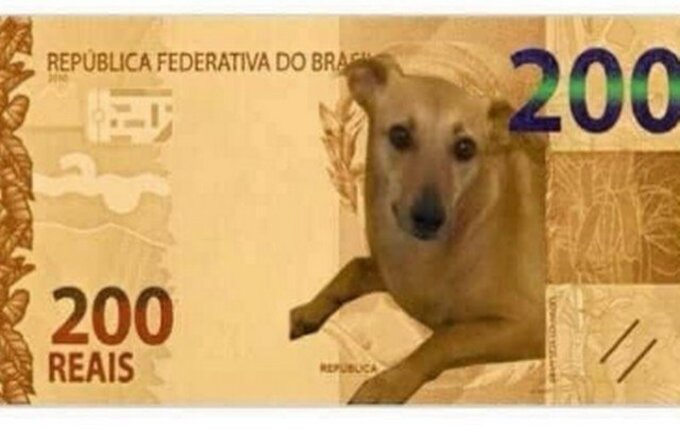

In [12]:
Image.open('caramelo.png')

Apenas reconstruindo a imagem

1/1 [==============================] - 0s 67ms/step


(<matplotlib.image.AxesImage at 0x18101fd2230>, (-0.5, 127.5, 127.5, -0.5))

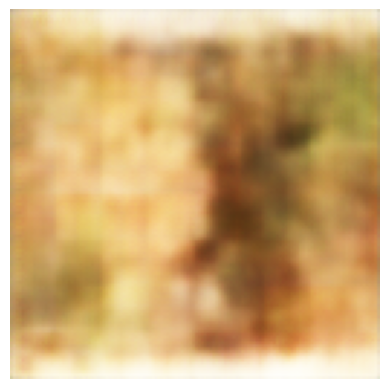

In [22]:
new_image = tf.keras.preprocessing.image.load_img('caramelo.png',target_size=(128, 128))
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.
x = tf.constant([new_image])

encoded = encoder.predict(x)
decoded_data = decoder.predict(encoded[0])

plt.imshow(decoded_data[0]), plt.axis('off')

Missigenação 

Cachorro 1 - Raça Dingo


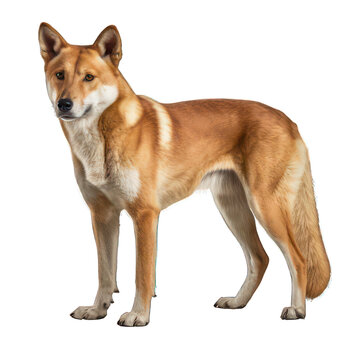

In [25]:
print('Cachorro 1 - Raça Dingo')
Image.open('dingo.jpg')

Cachorro 2 - Raça Labrador


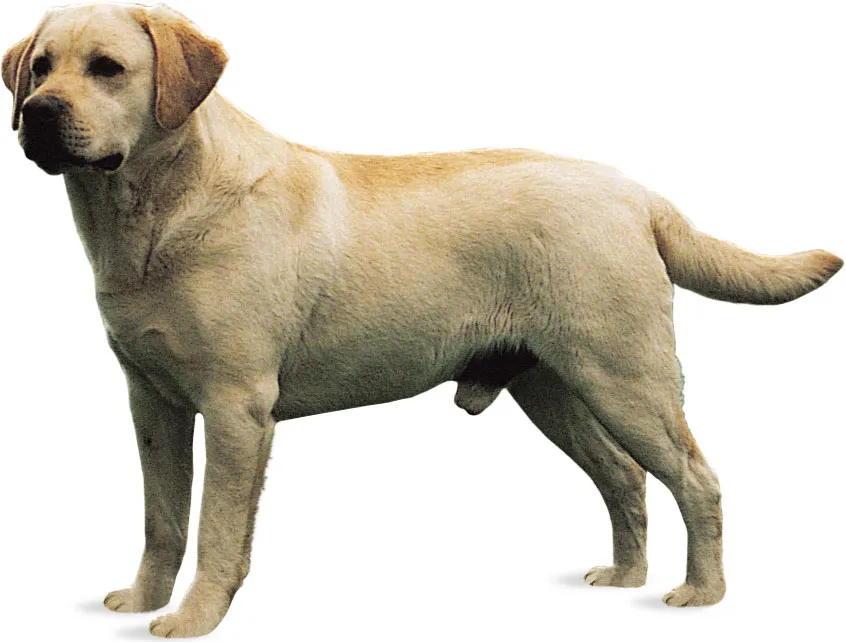

In [30]:
print('Cachorro 2 - Raça Labrador')
Image.open('labrador.jpeg')

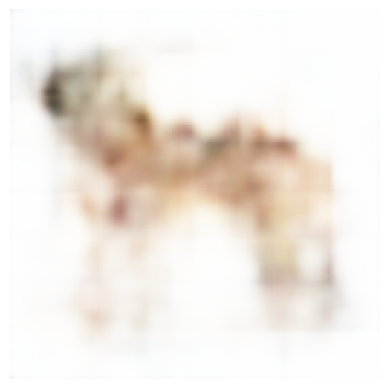

In [32]:
## Gerando espaço latente para o Dingo
new_image = tf.keras.preprocessing.image.load_img('dingo.jpg',target_size=(128, 128))
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.
x_dingo = tf.constant([new_image])

## Gerando espaço latente para o Labrador
new_image = tf.keras.preprocessing.image.load_img('labrador.jpg',target_size=(128, 128))
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.
x_labrador = tf.constant([new_image])

## Interpolando
z1_mean, z1_log_var, z1 = encoder(x_dingo)
z2_mean, z2_log_var, z2 = encoder(x_labrador)
t = 0.5 
z_interp = t * z1 + (1 - t) * z2

# Reconstruir a nova imagem
imagem_misturada = decoder(np.array(z_interp))[0]

plt.imshow(imagem_misturada), plt.axis('off')
plt.show()

#### 4. Ou será que você descobre que raça é o querido mascote do nosso time de IA, o Pythinho?

Por se tratar de um modelo generativo que aprende a representação latente dos dados de entrada de forma não supervisionada não é possível, de uma maneira direta, atribuir rótulos às características latentes. 

A forma mais próxima de responder a raça do Pythinho utilizando VAE, é considerando o CVAE (Conditional Variational Autoencoder) que, além dos dados de entrada, também são fornecidas informações adicionais, como rótulos de classe.

O que pode ser feito, alternativamente, é explorar as características latentes aprendidas que possam estar correlacionados com determinados rótulos. Envolvendo também uma análise qualitativa dessas. 

(Ex.: O espaço latente do Pythinho tem pontos distribuídos onde geralmente ficam os pontos das raças Rottweiler e Pinscher)

Pythinho


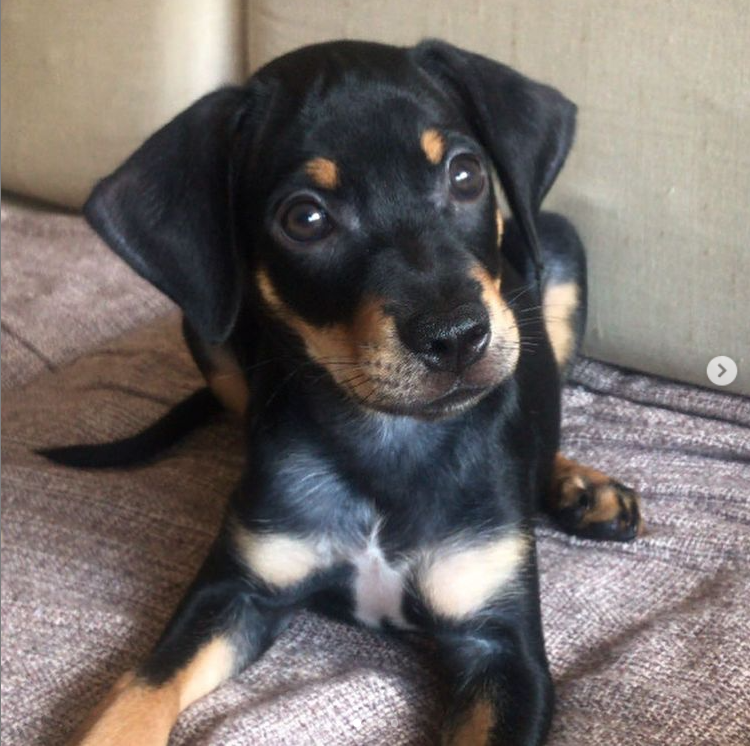

In [39]:
print('Pythinho')
Image.open('Pythinho.png')

1/1 [==============================] - 0s 50ms/step


(<matplotlib.image.AxesImage at 0x181039ae140>, (-0.5, 127.5, 127.5, -0.5))

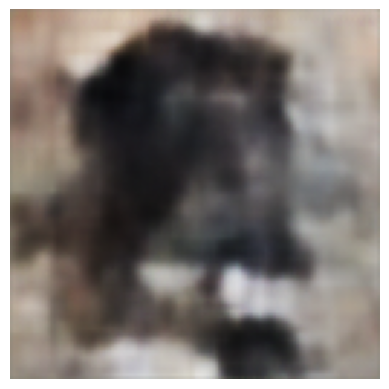

In [37]:
new_image = tf.keras.preprocessing.image.load_img('Pythinho.png',target_size=(128, 128))
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.
x = tf.constant([new_image])

encoded = encoder.predict(x)
decoded_data = decoder.predict(encoded[0])

plt.imshow(decoded_data[0]), plt.axis('off')